In [17]:
#from https://archive.ics.uci.edu/ml/machine-learning-databases/00352/

In [100]:
import numpy as np

In [189]:
import datetime

In [1]:
import pandas as pd

In [183]:
import seaborn as sns

In [184]:
import matplotlib.pyplot as plt

In [3]:
retaildf = pd.read_excel('OnlineRetail.xlsx')

In [4]:
retaildf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retaildf.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
retaildf.index

RangeIndex(start=0, stop=541909, step=1)

In [7]:
len(retaildf)

541909

In [188]:
#Samplng the dataset and keeping 10% of the original dataset

In [8]:
df = retaildf.sample(frac=0.1, replace=True, random_state=7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54191 entries, 189636 to 171732
Data columns (total 8 columns):
InvoiceNo      54191 non-null object
StockCode      54191 non-null object
Description    54060 non-null object
Quantity       54191 non-null int64
InvoiceDate    54191 non-null datetime64[ns]
UnitPrice      54191 non-null float64
CustomerID     40615 non-null float64
Country        54191 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.7+ MB


In [10]:
df['InvoiceDate'].head()

189636   2011-05-13 15:53:00
535030   2011-12-07 15:55:00
328599   2011-09-07 09:37:00
79463    2011-02-02 11:41:00
315737   2011-08-28 13:32:00
Name: InvoiceDate, dtype: datetime64[ns]

In [11]:
df = df.reset_index()

In [12]:
df.index

RangeIndex(start=0, stop=54191, step=1)

In [13]:
df.InvoiceDate.head()

0   2011-05-13 15:53:00
1   2011-12-07 15:55:00
2   2011-09-07 09:37:00
3   2011-02-02 11:41:00
4   2011-08-28 13:32:00
Name: InvoiceDate, dtype: datetime64[ns]

In [190]:
#Function to strip year, month, day from the datetime object of the columns InvoiceDate

In [21]:
def day(x):
    return datetime.datetime(x.year, x.month, x.day)

In [191]:
#Creating an InvoiceDay column stripping out timestamp from InvoiceDate column

In [22]:
df['InvoiceDay'] = df['InvoiceDate'].apply(day)

In [ ]:
#making a groupby object grouping by CustomerID and selecting InvoiceDay column

In [24]:
grouping = df.groupby('CustomerID')['InvoiceDay'] 

In [193]:
df['ClusterDay'] = grouping.transform('min') #Making ClusterDay column by taking the first date when the transaction
#was done from that CustomerID

In [30]:
df.ClusterDay.head()

0          NaT
1   2011-01-05
2   2011-05-10
3   2011-02-02
4   2011-01-07
Name: ClusterDay, dtype: datetime64[ns]

In [31]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,ClusterDay
0,189636,553162,21918,SET 12 KIDS COLOUR CHALK STICKS,1,2011-05-13 15:53:00,0.83,NaN,United Kingdom,2011-05-13,NaT
1,535030,581181,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-12-07 15:55:00,2.10,14189.0,United Kingdom,2011-12-07,2011-01-05
2,328599,565792,22178,VICTORIAN GLASS HANGING T-LIGHT,36,2011-09-07 09:37:00,1.95,14397.0,United Kingdom,2011-09-07,2011-05-10
3,79463,542989,22642,SET OF 4 NAPKIN CHARMS STARS,12,2011-02-02 11:41:00,2.55,15226.0,United Kingdom,2011-02-02,2011-02-02
4,315737,564734,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-08-28 13:32:00,1.25,12484.0,Spain,2011-08-28,2011-01-07


In [194]:
# Defining a function date which returns the year, month and day vlues from datetime object separately

In [61]:
def date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [62]:
invoice_year, invoice_month, invoice_day = date(df, 'InvoiceDay')

In [63]:
# type(df.InvoiceDay)

pandas.core.series.Series

In [39]:
# df.InvoiceDay = pd.to_datetime(df.InvoiceDay)

In [64]:
df = df.drop('index', axis=1)

ValueError: labels ['index'] not contained in axis

In [65]:
# df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,ClusterDay
0,553162,21918,SET 12 KIDS COLOUR CHALK STICKS,1,2011-05-13 15:53:00,0.83,NaN,United Kingdom,2011-05-13,NaT
1,581181,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-12-07 15:55:00,2.10,14189.0,United Kingdom,2011-12-07,2011-01-05
2,565792,22178,VICTORIAN GLASS HANGING T-LIGHT,36,2011-09-07 09:37:00,1.95,14397.0,United Kingdom,2011-09-07,2011-05-10
3,542989,22642,SET OF 4 NAPKIN CHARMS STARS,12,2011-02-02 11:41:00,2.55,15226.0,United Kingdom,2011-02-02,2011-02-02
4,564734,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,2011-08-28 13:32:00,1.25,12484.0,Spain,2011-08-28,2011-01-07


In [195]:
# Getting cluster_year, cluster_month and cluster_day df from ClusterDay column

In [66]:
cluster_year, cluster_month, cluster_day = date(df,'ClusterDay')

In [196]:
# Creating an float value of difference in invoive and cluster time in terms of number of months

In [116]:
df['ClusterIndex'] = 12*(invoice_year-cluster_year) +(invoice_month-cluster_month) +1

### Calculating metrics - retention rate

In [118]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'ClusterDay',
       'ClusterIndex', 'ClusterMonthIndex'],
      dtype='object')

In [119]:
df.InvoiceDay.head()

0   2011-05-13
1   2011-12-07
2   2011-09-07
3   2011-02-02
4   2011-08-28
Name: InvoiceDay, dtype: datetime64[ns]

In [121]:
df['ClusterYearIndex'] = (invoice_year - cluster_year)

In [122]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'ClusterDay',
       'ClusterIndex', 'ClusterMonthIndex', 'ClusterYearIndex'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54191 entries, 0 to 54190
Data columns (total 13 columns):
InvoiceNo            54191 non-null object
StockCode            54191 non-null object
Description          54060 non-null object
Quantity             54191 non-null int64
InvoiceDate          54191 non-null datetime64[ns]
UnitPrice            54191 non-null float64
CustomerID           40615 non-null float64
Country              54191 non-null object
InvoiceDay           54191 non-null datetime64[ns]
ClusterDay           40615 non-null datetime64[ns]
ClusterIndex         40615 non-null float64
ClusterMonthIndex    40615 non-null float64
ClusterYearIndex     40615 non-null float64
dtypes: datetime64[ns](3), float64(5), int64(1), object(4)
memory usage: 5.4+ MB


In [197]:
# Creating a separate dataframe df1 from df dropping rows with NA values - NA CustomerIDs

In [124]:
df1 = df.dropna(axis=0)

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40615 entries, 1 to 54189
Data columns (total 11 columns):
InvoiceNo       40615 non-null object
StockCode       40615 non-null object
Description     40615 non-null object
Quantity        40615 non-null int64
InvoiceDate     40615 non-null datetime64[ns]
UnitPrice       40615 non-null float64
CustomerID      40615 non-null float64
Country         40615 non-null object
InvoiceDay      40615 non-null datetime64[ns]
ClusterDay      40615 non-null datetime64[ns]
ClusterIndex    40615 non-null float64
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 5.0+ MB


In [128]:
df1 = df1.drop(['ClusterMonthIndex', 'ClusterYearIndex'], axis=1)

In [199]:
# Function month(x) will return the month, year and first date of the datetime obejct x (to get acquisition month)

In [142]:
def month(x):
    return datetime.datetime(x.year, x.month, 1)

In [143]:
df1['InvoiceMonth'] = df1['InvoiceDate'].apply(month)

In [200]:
df1['ClusterMonth'] = df1['ClusterDay'].apply(month) # Acquisition month

In [152]:
# max(df1.ClusterIndex)

13.0

In [201]:
# Groupby object with multiindex ClusterMonth and ClusterIndex

In [153]:
newgroup = df1.groupby(['ClusterMonth', 'ClusterIndex'])

In [203]:
# Selecting CustomerIDs and taking in number of unique IDs for that ClusterMonth (active IDs in that month)

In [154]:
clusterdata = newgroup['CustomerID'].apply(pd.Series.nunique).reset_index()

In [136]:
# df1['ClusterMonth'] = df1.ClusterDay.dt.month

In [156]:
clustercounts = clusterdata.pivot(index='ClusterMonth', columns='ClusterIndex', values='CustomerID')

In [162]:
clustercounts

ClusterIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
ClusterMonth,,,,,,,,,,,,,
2010-12-01,675.0,213.0,197.0,240.0,201.0,241.0,215.0,209.0,210.0,232.0,222.0,303.0,162.0
2011-01-01,372.0,72.0,93.0,75.0,106.0,96.0,79.0,76.0,97.0,118.0,137.0,48.0,NaN
2011-02-01,303.0,50.0,47.0,78.0,70.0,58.0,73.0,72.0,73.0,80.0,17.0,NaN,NaN
2011-03-01,385.0,53.0,96.0,74.0,82.0,65.0,91.0,86.0,105.0,34.0,NaN,NaN,NaN
2011-04-01,267.0,47.0,54.0,49.0,48.0,64.0,53.0,64.0,14.0,NaN,NaN,NaN,NaN
2011-05-01,248.0,41.0,32.0,34.0,44.0,52.0,54.0,21.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,227.0,32.0,35.0,51.0,46.0,64.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,190.0,28.0,37.0,37.0,45.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,154.0,24.0,34.0,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
clustersize = clustercounts.iloc[:,0]

In [169]:
retentionRate = clustercounts.divide(clustersize, axis=0)*100

In [204]:
# Retention rate here is the (active accounts/intial accounts acquired at the start)

In [170]:
retentionRate

ClusterIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
ClusterMonth,,,,,,,,,,,,,
2010-12-01,100.0,31.555556,29.185185,35.555556,29.777778,35.703704,31.851852,30.962963,31.111111,34.370370,32.888889,44.888889,24.0
2011-01-01,100.0,19.354839,25.000000,20.161290,28.494624,25.806452,21.236559,20.430108,26.075269,31.720430,36.827957,12.903226,NaN
2011-02-01,100.0,16.501650,15.511551,25.742574,23.102310,19.141914,24.092409,23.762376,24.092409,26.402640,5.610561,NaN,NaN
2011-03-01,100.0,13.766234,24.935065,19.220779,21.298701,16.883117,23.636364,22.337662,27.272727,8.831169,NaN,NaN,NaN
2011-04-01,100.0,17.602996,20.224719,18.352060,17.977528,23.970037,19.850187,23.970037,5.243446,NaN,NaN,NaN,NaN
2011-05-01,100.0,16.532258,12.903226,13.709677,17.741935,20.967742,21.774194,8.467742,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,14.096916,15.418502,22.466960,20.264317,28.193833,9.251101,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,14.736842,19.473684,19.473684,23.684211,7.368421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,15.584416,22.077922,27.272727,9.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculating metrics - average price

In [174]:
clusterMeanPrice = newgroup['UnitPrice'].mean().reset_index()

In [178]:
clusterMeanPrice.head()

,ClusterMonth,ClusterIndex,UnitPrice
0,2010-12-01,1.0,3.076297
1,2010-12-01,2.0,2.998871
2,2010-12-01,3.0,3.371336
3,2010-12-01,4.0,2.872365
4,2010-12-01,5.0,2.689202


In [179]:
clusterMeanPricePivot = clusterMeanPrice.pivot(index='ClusterMonth', columns='ClusterIndex', values='UnitPrice')

In [180]:
clusterMeanPricePivot.round(2)

ClusterIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
ClusterMonth,,,,,,,,,,,,,
2010-12-01,3.08,3.00,3.37,2.87,2.69,3.13,3.22,2.72,6.56,2.72,6.10,3.34,2.74
2011-01-01,4.50,4.39,3.20,2.83,3.07,3.12,3.21,2.69,2.99,3.94,2.83,2.50,NaN
2011-02-01,3.25,3.44,2.76,3.29,2.48,2.73,3.01,2.79,3.01,2.90,2.71,NaN,NaN
2011-03-01,3.45,2.91,3.59,4.23,2.93,2.56,3.04,3.08,2.69,2.50,NaN,NaN,NaN
2011-04-01,2.99,3.04,3.62,2.28,2.55,2.80,4.01,3.05,2.23,NaN,NaN,NaN,NaN
2011-05-01,8.10,2.54,2.33,2.65,2.26,2.30,2.68,2.46,NaN,NaN,NaN,NaN,NaN
2011-06-01,3.24,1.82,3.40,3.56,2.59,2.79,2.18,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,2.94,2.82,2.71,2.98,2.65,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.87,3.52,3.66,16.27,3.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Heatmap

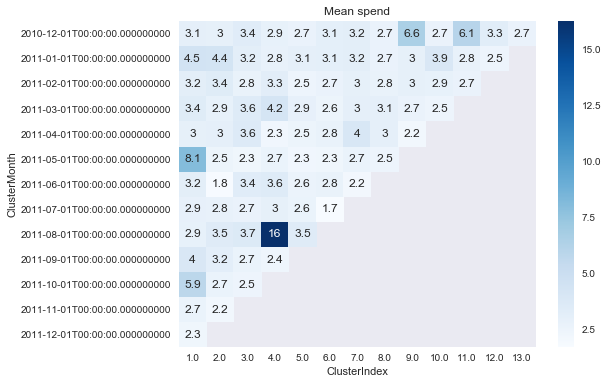

In [186]:
plt.figure(figsize=(8,6))
plt.title('Mean spend')
sns.heatmap(data=clusterMeanPricePivot,
           annot=True,
           cmap='Blues')
plt.show()